In [32]:
import numpy as np
import matplotlib.pyplot as plt

def fact(n): # RECURSIVE!!!!!!!!!!
  if n == 1: # 0! = 1!, so only need to go down to 1
    return 1
  else:
    return n*fact(n-1)

def gaussElim(A,b):
    """
    Routine to solve problem Ax = b using gauss elim.
    A is an NxN matrix, b a column vector of size N
    returns x vector of dimentsion N
    """
    # setup our augmented matrix by copying A and b
    N = A.shape[0]
    augmat = np.zeros((N, N+1))
    augmat[:,:N] = np.copy(A)
    augmat[:,N] = np.copy(b)
    
    for pivot in range(0,N):
        refrow = pivot
        for row in range(refrow+1, N):
            ratio =  augmat[row,refrow]/augmat[refrow,refrow]
            for col in range(refrow, N+1):
                augmat[row,col] = augmat[row,col] - augmat[refrow,col]*ratio
    #print(augmat)
    x = np.zeros(N)
    for row in range(N-1,-1,-1):
        x[row] = augmat[row,N] 
        for col in range(row+1, N):
            x[row] -= augmat[row,col]*x[col] 
        x[row] = x[row]/augmat[row,row]       
    return x

def lagrangePoly(myx,x,y):
  result = 0
  for i in range(len(x)):
    for j in range(len(x)):
      partResult = 1
      if (j-1)**2 <1:
        pass
      else:
        partResult *= (x-x[j])/(x[i]-x[j])
    result = partResult*y[i]
  return result

def lerp(xi,x0,y0,x1,y1):
  result = y0 +(xi-x0)*(y1-y0)/(x1-x0)
  return result

def TrapeziumRule(leng,array,func,change):
  integ = 0
  integ += (0.5*array[0]*func[0])+(0.5*array[-1]*func[-1])
  for datapoint in range(1,leng-1):
    integ += array[datapoint]  * func[datapoint]
  integ *= change/np.pi
  return integ

In [2]:
x = np.linspace(-np.pi,np.pi)
x

array([-3.14159265, -3.01336438, -2.88513611, -2.75690784, -2.62867957,
       -2.5004513 , -2.37222302, -2.24399475, -2.11576648, -1.98753821,
       -1.85930994, -1.73108167, -1.60285339, -1.47462512, -1.34639685,
       -1.21816858, -1.08994031, -0.96171204, -0.83348377, -0.70525549,
       -0.57702722, -0.44879895, -0.32057068, -0.19234241, -0.06411414,
        0.06411414,  0.19234241,  0.32057068,  0.44879895,  0.57702722,
        0.70525549,  0.83348377,  0.96171204,  1.08994031,  1.21816858,
        1.34639685,  1.47462512,  1.60285339,  1.73108167,  1.85930994,
        1.98753821,  2.11576648,  2.24399475,  2.37222302,  2.5004513 ,
        2.62867957,  2.75690784,  2.88513611,  3.01336438,  3.14159265])

In [6]:
dx = x[1]-x[0]
dx

0.12822827157509353

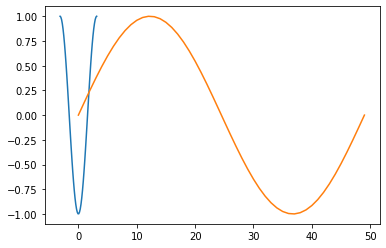

In [21]:
m = 50
mult = m*np.pi
phim = np.cos(mult*x/np.pi)
psim = np.sin(mult*x/np.pi)
plt.plot(x,phim,psim)

In [34]:
fx = np.cos(x)
myintegral = TrapeziumRule(len(x),phim,fx,dx)
myintegral

-0.9999999999999971